# Week 2: Probability and the Central Limit Theorem (CLT)

## **Notebook Overview**


This notebook reviews:

- Probability
- The central limit theorem

I am aware the central limit theorem was only briefly covered in class so we will be doing a big recap in the Friday TA session.

### **Additional Resources**


Some of you have been asking for additional resources to help understand the problems so here are a few below. Keep in mind that these are textbooks designed for whole degrees of study so they are in much more detail than you need and cover far more topics. Be selective with your reading and keep in mind that the theory in these books is far deeper than we need.

1. [Wooldridge Econometrics:](https://www.academia.edu/44467534/ECONOMETRICS_A_Modern_Approach) A great textbook for statistical modelling, though goes into far more theoretical details than we need for this course. Maths Refreshers A, B and C would be very useful for people who have been away from maths for a while. Maths Refresher A (page 666) starts with recaps of things like percentages, summation...etc. Maths Refresher B (page 684) is a good section for probability. Maths Refresher C (page 714) is about statistics. All three of these chapters have more topics/theory than needed for this course so be selective with your reading. In general this is a great textbook for anyone wanting to explore the theory of the course in more detail.

2. A-level/high school maths textbooks. The UK A-level maths textbooks explain this content from an introductory level. [Edexcel A-Level Maths Old-spec S1:](https://app.box.com/s/amidflaiy8mt2b19uxre6k59mjdfsuhg) Good for the basics. Probability, discrete random variables, normal distributions. [Edexcel A-Level Maths Old-spec S2:](https://app.box.com/s/nl94ctzktuhqofd0gngh6339oqvu85rk) Great for distributions, continuous random variables. [Edexcel A-Level Maths Old-spec S3 and S4:](https://www.aectutors.co.uk/resources/resources-maths-alevel-old-specs/maths-a-level-text-ebooks) You can download these from here though the online previews don't load for me. S3 is a good introduction to the central limit theorem and confidence intervals. S4 introduces the t-distribution and t-tests.

3. The Fox textbook (available on the Canvas reading list) is also okay but mainly starts at regression (Week 3 onwards). Not fantastic for an introduction to statistical theory.
___

### **Notebook Questions**

In each subsection there is text, some code which is already filled in and then code or questions for you to answer at the end.

Please work through each section. It's not a massively long notebook so worth doing it in detail.

As usual we will start by importing some useful libraries. Recall from the
[previous
notebook](https://github.com/Yushi-Y/AAS-ongoing-tutorials/tree/main/W1-Intro_to_Python)
that it is good practise to import these packages with the standard
abbreviations of their names.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # format images as svgs (higher quality)

## **Probability Review**


This section is a brief review of probability as a way to work towards the central limit theorem.

### Expected Value

For a real-valued random variable, the expected value is the average of the possible outcomes weighted by the respective probabilities of occurring. See the lecture notes for more explanation on this.

### Question 1:

Define a random variable X as follows: you roll a fair six-sided die until a six is rolled, X is the total number of rolls required to get a six (inclusive of the final roll). What is the expected value of X?

We have answered this question mathematically below. Simulate this procedure and show the result with a chart to verify the math is correct.

### Mathematical Answer

The expected value is given by the summation over all possible values of X multiplied by their probabilites:

$\mathbb{E}(X) = \sum_{i=1}^{\infty}i*P(X=i)$

For a fair die, the probability $P(X=i) = \frac{5}{6}^{i-1}*\frac{1}{6}$.

i.e. you have $i-1$ rolls which are not a six and then get a six.

The summation is then:

$\mathbb{E}(X) = \sum_{i=1}^{\infty}i*\frac{5}{6}^{i-1}*\frac{1}{6} $

$= 1*\frac{5}{6}^{0}*\frac{1}{6} + 2*\frac{5}{6}^{1}*\frac{1}{6} + 3*\frac{5}{6}^{2}*\frac{1}{6} ... $

This is an infinite geometric series. Recall that a geometric series is a series such that each term of the summation is equal to the previous term times some ratio $r$,

$a + ar + ar^2 + ar^3...$

and the sum of an infinite geometric series is $\frac{a}{1-r}$.

We can observe that this is a sum of several geometric series with $r=\frac{5}{6}$:

$\frac{5}{6}^{0}*\frac{1}{6} + 2*\frac{5}{6}^{1}*\frac{1}{6} + 3*\frac{5}{6}^{2}*\frac{1}{6}... = $

$\frac{5}{6}^{0}*\frac{1}{6} + \quad  \frac{5}{6}^{1}*\frac{1}{6}  + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

$\qquad \quad + \quad  \frac{5}{6}^{1}*\frac{1}{6} + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

$\qquad \quad + \qquad  \qquad + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

The sum of each series is $\frac{a}{1-r}$ where $a$ is the first term, so this is equivalent to:

$\frac{\frac{1}{6}}{1-\frac{5}{6}} + \frac{\frac{5}{36}}{1-\frac{5}{6}} + \frac{\frac{25}{216}}{1-\frac{5}{6}}...$

$ = 1 + \frac{5}{6} + \frac{25}{36}...$

Which is itself a geometric series:

$\sum_{i=1}^{\infty}\frac{5}{6}^i = \frac{1}{1-\frac{5}{6}} = 6$

Therefore, $\mathbb{E}(X) = 6$


**NOTE:** As a shortcut, you could have noticed that this is one of the definitions of a geometric random variable and looked up the mean to find that it is $\frac{1}{p}$




### Monte Carlo Approach
The Monte Carlo approach is a method of getting to the answer by simulating reality ([Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)). It's generally used in siutations where determining the answer to a problem is mathematically difficult or even impossible. To overcome this, the user simulates the real world enviornment and runs a large number of repeats. The mean result gives an estimation for the answer.

In this example, write a set of code to model the world described. Perhaps you need a function to model rolling a dice. Then, maybe a function to count the number of rolls until a 6...etc. With the real world modelled you should then repeat these functions many times. This can be hundreds, thoudands, tens of thousands... the more the better as it will reduce your sample error (in general Monte Carlo simulations you are limited by the time your code takes to run).

From the repeats then calculate the empirical mean, which, given the set up and large number of repeats, should be close to the true mean.


In [ ]:
# Code...

### Extension Question (Harder)

Only do this if you've completed everything else and want to explore this topic further.

The Monty Hall problem is a famous problem of conditional probability which some of you might have come across before ([Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem)). The original question is as follows:

*Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?*

The answer feels non-intuitive when you first see the problem and confused many mathematicians. Famously, when the answer was printed in a newspaper, thousands of PhD students and academics wrote in to say that the answer was wrong (it was not). [Erdos](https://en.wikipedia.org/wiki/Paul_Erdős), a prominent mathematician remained unconvinced of the answer until he saw a computer simulation.

Create a simulation of this problem in the same way as the last problem then use a Monte Carlo method to show that the probabilities originally printed in the newspaper are correct.


In [ ]:
# Code...

## **Central Limit Theorem: Motivating Example**


Arguably the most important theorem in statistics. The central limit theorem (CLT) underpins many of the results in the topics we will learn about in future weeks. One of my old statistics tutors described the result as the most beautiful thing humanity had ever discovered. This might be a bit of a stretch but it is certainly a remarkable result. **It is worth investing time to understand this.**

The CLT tells us about the distribution of the sample mean as the number of observations grows. As mentioned, a lot of results in statistics rely on
the CLT, so it is worth getting familiar with the details. There are some
conditions that need to be satisfied for the CLT to hold, for example, we will
usually want to know that the samples are independent and identically
distributed (IID) and that they are drawn from a distribution with a finite
variance.

### CLT: Motivating example

### Question 2 (unanswered questions at the end of the section)

Write the following functions:

1. A function called `rand_exp_mean` which takes a number, `n`, and a rate,
   `lam` and returns the sample average of `n` exponentially distributed (with
   rate `lam`) random variables. Note this should return a different value each
   time you call it since it is a random function. `n` is the number of draws from the distribution in each sample mean.
2. A function called `rand_sample_means` which takes a number, `n` and a rate,
   `lam` and returns an array with 1000 evaluations of the function call
   `rand_exp_mean(n, lam)`. Note that a list comprehension may help here.

### Answer

In [ ]:
def rand_exp_mean(n, lam):
    return stats.expon.rvs(scale = 1/lam, size = n).mean()

def rand_sample_means(n, lam):
    return np.array([rand_exp_mean(n, lam) for _ in range(1000)])

Next, make a histogram of the values from `rand_sample_means` in the question above with `lam=0.2` and `n=5`. On top of this, plot the probability density function of a normal distribution with mean $5$ and standard deviation $5 / \sqrt{5}$. Keep in mind that `5` is a low number number of draws for each sample.

Create a new plot where you repeat this process with `n=100` and with a normal distribution with standard deviation $5 / \sqrt{100}$. `100` is a relatively high number of draws for each sample. What do you notice?

### Answer

First the plot with `n=5`

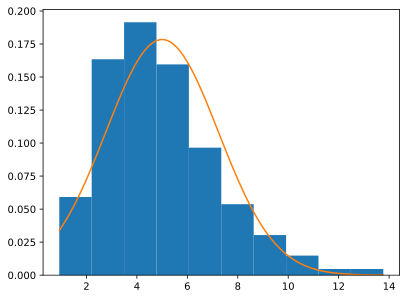

In [ ]:
n = 5

# Generate 1000 values from your random sample means function (each sample mean is the mean of n draws)
rand_sms = rand_sample_means(n, 0.2)

# Use the linspace function from numpy and the stats.norm.pdf function to generate x and y coordinates of a normal distribution
clt_xs = np.linspace(rand_sms.min(), rand_sms.max(), num=100)
clt_ys = stats.norm.pdf(clt_xs, loc=5, scale=5/np.sqrt(n))

# Plot everything up using matplotlib
plt.figure()
plt.hist(rand_sms, density=True)
plt.plot(clt_xs, clt_ys)
plt.show()

Then the plot with `n=100`. Repeat. Your function still generates 1000 sample means but each sample mean is the mean of 100 draws from the distribution.

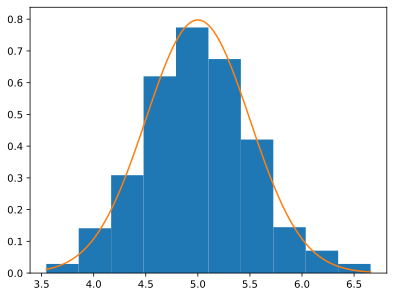

In [ ]:
n = 100
rand_sms = rand_sample_means(n, 0.2)
clt_xs = np.linspace(rand_sms.min(), rand_sms.max(), num=100)
clt_ys = stats.norm.pdf(clt_xs, loc=5, scale=5/np.sqrt(n))

plt.figure()
plt.hist(rand_sms, density=True)
plt.plot(clt_xs, clt_ys)
plt.show()

### Questions

a) What do you notice about the two plots? Describe their differences?





b) Why is this the case and what role does `n` have in this?

## **Central Limit Theorem: Theory**

### Question 3

Write down a statement of the law of large numbers (LLN). See [here](https://en.wikipedia.org/wiki/Law_of_large_numbers) as not covered in the lecture. Also write down a statement of the central limit theorem. Make sure you understand what each of them tells you.

### Answer

-   LLN: $\bar{X}$ converges to $\mu$ as the sample size increases.
-   CLT: $\sqrt{n}(\bar{X} - \mu) / \sigma$ converges in distribution to the
    standard normal distribution as the sample size increases.
-   The LLN tells you what the limiting value is, the CLT tells you
    about the fluctuations in the estimate.

### Example: CLT

To see that the distribution of the sample mean converges to a normal
distribution we will do a simulation study.

### Question 4

Write down the distribution of the sample mean given an IID sample of
exponential random variables with rate $1/5$.

### Answer

-   The mean of the exponential distribution is 5.
-   The standard deviation of the exponential distribution is 5
-   The CLT tells us the limiting distribution for the sample mean is $N\left(5,\frac{5^2}{n}\right)$

### Question 5

Explain the central limit theorem in your own words being as detailed as possible. When might we use it? Why is it important in statistics?

### Answer

